# linear regression model applying for ASOS_alone.pickle

## load datset

In [1]:
# import some function we can use later
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import sys
from IPython.display import display, Image
from six.moves import cPickle as pickle
%matplotlib inline

In [2]:
import time

In [4]:
#load data first
pickle_file = '/home/htan/proj/TensorFlow/data/visibility/' +  'ASOS+NWP.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset= save['t_v_dataset']
    test_dataset = save['test_dataset']
    del save
    

In [5]:
train_time = train_dataset['time']
train_data = np.hstack((train_dataset['data_ASOS'], train_dataset['data_NWP']))
train_label = train_dataset['label']

test_time = test_dataset['time']
test_data = np.hstack((test_dataset['data_ASOS'], test_dataset['data_NWP']))
test_label = test_dataset['label']


In [7]:
print(train_data.shape, train_label.shape)

print(test_data.shape, test_label.shape)

(116657, 82) (116657,)
(29165, 82) (29165,)


In [8]:
print(train_label[:10])

[  7.  10.  10.  10.  10.  10.  10.  10.  10.  10.]


## dataset normalize

In [10]:
#dataset normalize
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
print(mean.shape, std.shape)
train_data_n = (train_data - mean)/std

test_data_n = (test_data - mean)/std

(82,) (82,)


In [11]:
def MAE(clf, n_data, label):
    return (abs((clf.predict(n_data) - label))).mean()

## simple linear model

In [13]:
#SGDRegressor
'''SGD has been applied to large-scal and sparse machine learning problems. could be use when training dataset is large
than 100,000'''
from sklearn import linear_model
clf = linear_model.SGDRegressor()
s_t = time.time()
clf.fit(train_data_n, train_label)
e_t = time.time() 

In [16]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))
print("duration = %s" % (e_t - s_t))

train MAE = 0.546102
test MAE = 0.493817
duration = 0.670346975327


In [12]:
#ridge regression
clf = linear_model.Ridge(alpha = 0.5)
clf.fit(train_data_n, train_label)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))

train MAE = 0.524096
validate MAE = 0.463068
test MAE = 0.513630


In [17]:
#linear regression
clf = linear_model.LinearRegression()
s_t = time.time()
clf.fit(train_data_n, train_label)
e_t = time.time() 

In [18]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))
print("duration = %s" % (e_t - s_t))

train MAE = 0.534849
test MAE = 0.480443
duration = 0.745787143707


In [19]:
#Lasso model
clf = linear_model.Lasso(alpha = 0.1)
s_t = time.time()
clf.fit(train_data_n, train_label)
e_t = time.time() 

In [21]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))
print("duration = %s" % (e_t - s_t))

train MAE = 0.493104
test MAE = 0.430898
duration = 1.0119998455


In [24]:
#ElasticNet model
clf = linear_model.ElasticNet(alpha=0.1)
clf.fit(train_data_n, train_label)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))

train MAE = 0.512475
validate MAE = 0.440101
test MAE = 0.501289


In [26]:
#Lars model
clf = linear_model.Lars()
clf.fit(train_data_n, train_label)

/home/nfs/mjmu/haiming/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 30 iterations, i.e. alpha=5.474e-05, with an active set of 27 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/nfs/mjmu/haiming/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 30 iterations, i.e. alpha=5.472e-05, with an active set of 27 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/nfs/mjmu/haiming/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 43 iterations, i.e. alpha=6.904e-05, with an active set of 36 regressors, and the smallest cholesky pivot el

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [27]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))

train MAE = 1.442360
validate MAE = 1.441181
test MAE = 1.396386


In [28]:
#LassoLars model
clf = linear_model.LassoLars(alpha = 0.1)
clf.fit(train_data_n, train_label)

LassoLars(alpha=0.1, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [29]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))

train MAE = 1.622163
validate MAE = 1.423576
test MAE = 1.483127


In [30]:
#OrthogonalMatchingPursuit
clf = linear_model.OrthogonalMatchingPursuit()
clf.fit(train_data_n, train_label)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
             normalize=True, precompute='auto', tol=None)

In [31]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))

train MAE = 0.508798
validate MAE = 0.446586
test MAE = 0.499610


In [32]:
#BayesianRidge
clf = linear_model.BayesianRidge()
clf.fit(train_data_n, train_label)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [33]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))

train MAE = 0.523950
validate MAE = 0.462562
test MAE = 0.513460


In [34]:
#PassiveAggressiveRegressor
clf = linear_model.PassiveAggressiveRegressor()
clf.fit(train_data_n, train_label)

PassiveAggressiveRegressor(C=1.0, epsilon=0.1, fit_intercept=True,
              loss='epsilon_insensitive', n_iter=5, random_state=None,
              shuffle=True, verbose=0, warm_start=False)

In [35]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))

train MAE = 1.227330
validate MAE = 1.180869
test MAE = 1.300925


In [36]:
#TheilSenRegressor
#clf = linear_model.TheilSenRegressor()
#clf.fit(train_data_n, train_label)

In [37]:
#print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
#print("validate MAE = %f" % (MAE(clf, validate_data_n, validate_label)))

In [43]:
#try polynomial regresion:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree = 2)
poly_data = ploy.fit_transform(train_data)

In [44]:
poly_data.shape

(176987, 2556)

## nonlinear model

In [46]:
from sklearn.preprocessing import scale
poly_data_n = (poly_data - poly_data.mean(axis = 0)) / poly_data.std(axis = 0)
print(poly_data_n.shape)

MemoryError: 

In [41]:
clf = linear_model.SGDRegressor()
clf.fit(poly_data_n, train_label)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print("train MAE = %f" % (MAE(clf, poly_data_n, train_label)))

The result is very bad if we add more degree of freedom

In [28]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor(max_depth=5)
s_t = time.time()
clf.fit(train_data_n, train_label)
e_t = time.time() 

In [29]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))
print("duration = %s" % (e_t - s_t))

train MAE = 0.343525
test MAE = 0.416959
duration = 62.3478710651


In [26]:
train_MAE_list = []

test_old_MAE_list = []
for max_d in range(2, 11):
    regr_tree = DecisionTreeRegressor(max_depth=max_d)
    regr_tree.fit(train_data_n, train_label)
    print("max_depth = %i" % (max_d))
    #print("train MAE = %f" % (MAE(regr_tree, train_data_n, train_label)))
    #print("validate MAE = %f" % (MAE(regr_tree, validate_data_n, validate_label)))
    #print("test MAE = %f" % (MAE(regr_tree, test_old_data_n, test_old_label)))
    train_MAE_list.append(MAE(regr_tree, train_data_n, train_label))
    test_old_MAE_list.append(MAE(regr_tree, test_data_n, test_label))

max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth = 10


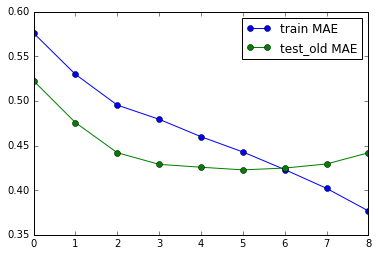

In [27]:
plt.plot(train_MAE_list, marker='o', label='train MAE')
plt.plot(test_old_MAE_list, marker='o', label = 'test_old MAE')
plt.legend()

In [52]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot


In [53]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(regr_tree, out_file=f)


In [32]:
#decision tree
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=7)
s_t = time.time()
clf.fit(train_data_n, train_label)
e_t = time.time() 

In [33]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))
print("duration = %s" % (e_t - s_t))

train MAE = 0.431701
test MAE = 0.408266
duration = 41.6639649868


In [30]:
train_MAE_list = []

test_old_MAE_list = []
for max_d in range(2, 21):
    regr = RandomForestRegressor(max_depth=max_d)
    regr.fit(train_data_n, train_label)
    print("max_depth = %i" % (max_d))
    #print("train MAE = %f" % (MAE(regr_tree, train_data_n, train_label)))
    #print("validate MAE = %f" % (MAE(regr_tree, validate_data_n, validate_label)))
    #print("test MAE = %f" % (MAE(regr_tree, test_old_data_n, test_old_label)))
    train_MAE_list.append(MAE(regr, train_data_n, train_label))
    test_old_MAE_list.append(MAE(regr, test_data_n, test_label))

max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth = 10
max_depth = 11
max_depth = 12
max_depth = 13
max_depth = 14
max_depth = 15
max_depth = 16
max_depth = 17
max_depth = 18
max_depth = 19
max_depth = 20


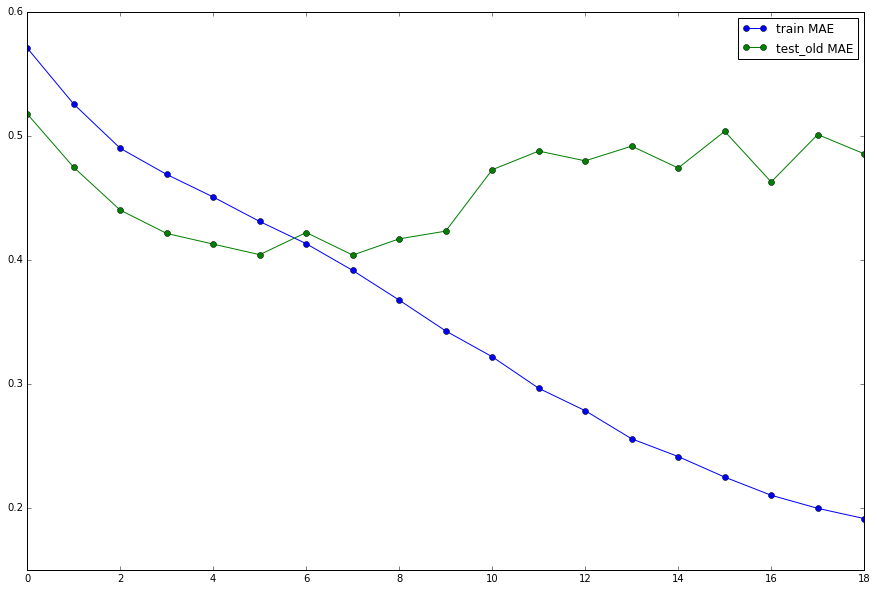

In [31]:
plt.figure(figsize = (15, 10))
plt.plot(train_MAE_list, marker='o', label='train MAE')
#plt.plot(validata_MAE_list, marker='o', label = 'validate MAE')
plt.plot(test_old_MAE_list, marker='o', label = 'test_old MAE')
plt.legend()

In [34]:
#SVR
from sklearn import svm
clf = svm.SVR()
s_t = time.time()
clf.fit(train_data_n, train_label)
e_t = time.time() 

In [35]:
print("train MAE = %f" % (MAE(clf, train_data_n, train_label)))
print("test MAE = %f" % (MAE(clf, test_data_n, test_label)))
print("duration = %s" % (e_t - s_t))

train MAE = 0.369533
test MAE = 0.388970
duration = 24946.4829118
